## Step 1 : Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy import stats

In [2]:
wine = pd.read_csv('wine-clustering.csv')
wine.head(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
wine.shape

(178, 13)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Data Cleansing

In [7]:
df_null = 100*(wine.isnull().sum())/len(wine)
df_null

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64

`No null values in the dataset`

Text(0, 0.5, 'Range')

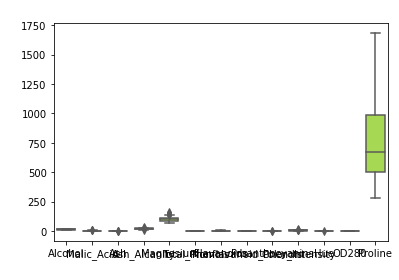

In [8]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data=wine, orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Attributes', fontweight='bold', color='white')
plt.ylabel('Range', fontweight='bold', color='white')

## Standard Scaling

In [9]:
wine_df = wine

scaler = StandardScaler()

wine_sc = scaler.fit_transform(wine_df)
wine_sc.shape

(178, 13)

In [10]:
wine_sc = pd.DataFrame(wine_sc)
wine_sc.columns = wine.columns
wine_sc.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Text(0, 0.5, 'Range')

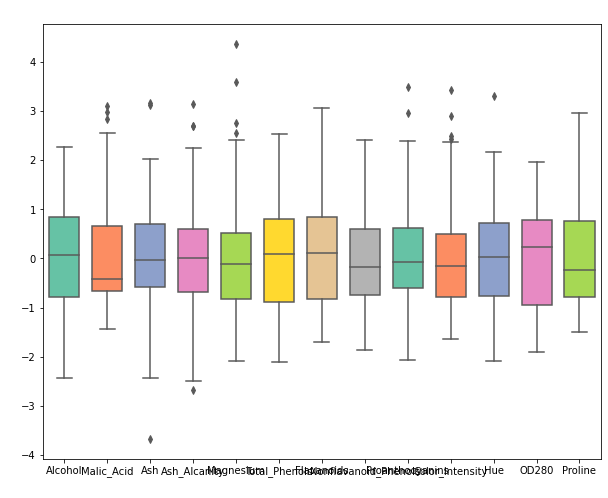

In [11]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data=wine_sc, orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Attributes', fontweight='bold', color='white')
plt.ylabel('Range', fontweight='bold', color='white')

### Reducing Outliers

In [12]:
z = np.abs(stats.zscore(wine_sc))
threshold = 3
wine_sc = wine_sc[(z < threshold).all(axis=1)]

Text(0, 0.5, 'Range')

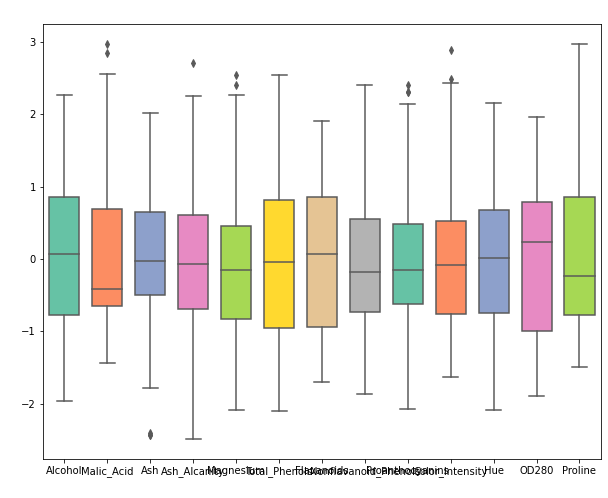

In [13]:
plt.rcParams['figure.figsize'] = [10, 8]

sns.boxplot(data=wine_sc, orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Attributes', fontweight='bold', color='white')
plt.ylabel('Range', fontweight='bold', color='white')

In [14]:
wine_sc.shape

(168, 13)

## Building Model

### K-Means

1. Finding Optimal K

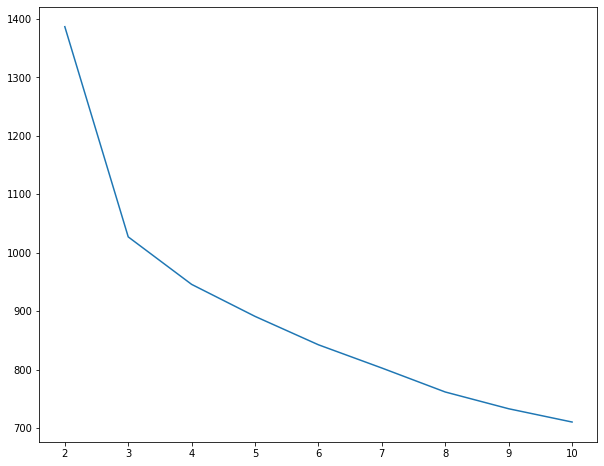

In [15]:
# SSD / Elbow Curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(wine_sc)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(range_n_clusters, ssd)
plt.show()

In [16]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(wine_sc)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(wine_sc, cluster_labels)
    
    print('For n_clusters={0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2798086849551767
For n_clusters=3, the silhouette score is 0.3062401807969496
For n_clusters=4, the silhouette score is 0.253081911853257
For n_clusters=5, the silhouette score is 0.20823895588568198
For n_clusters=6, the silhouette score is 0.1848303225473598
For n_clusters=7, the silhouette score is 0.13865183025216277
For n_clusters=8, the silhouette score is 0.13668238296595422
For n_clusters=9, the silhouette score is 0.14126621078661689
For n_clusters=10, the silhouette score is 0.13509556962047484


2. Final Model with K = 3

In [17]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(wine_sc)

KMeans(max_iter=50, n_clusters=3)

In [18]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
z = np.abs(stats.zscore(wine_df))
threshold = 3
wine_df = wine_df[(z < threshold).all(axis=1)]

In [20]:
wine_df['Cluster_ID'] = kmeans.labels_
wine_df.head()

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


<AxesSubplot:xlabel='Cluster_ID', ylabel='Alcohol'>

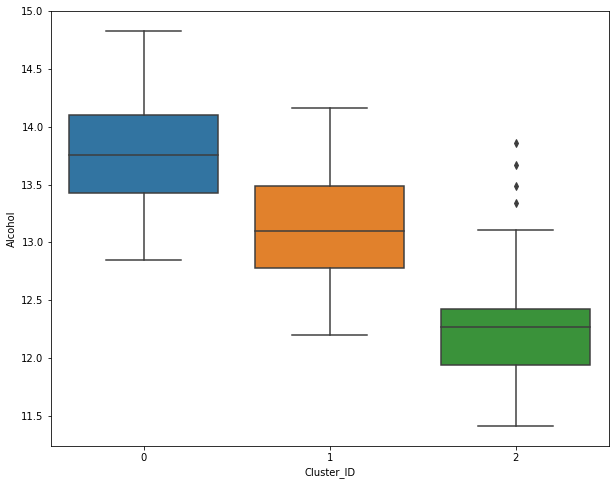

In [21]:
sns.boxplot(x='Cluster_ID', y='Alcohol', data=wine_df)

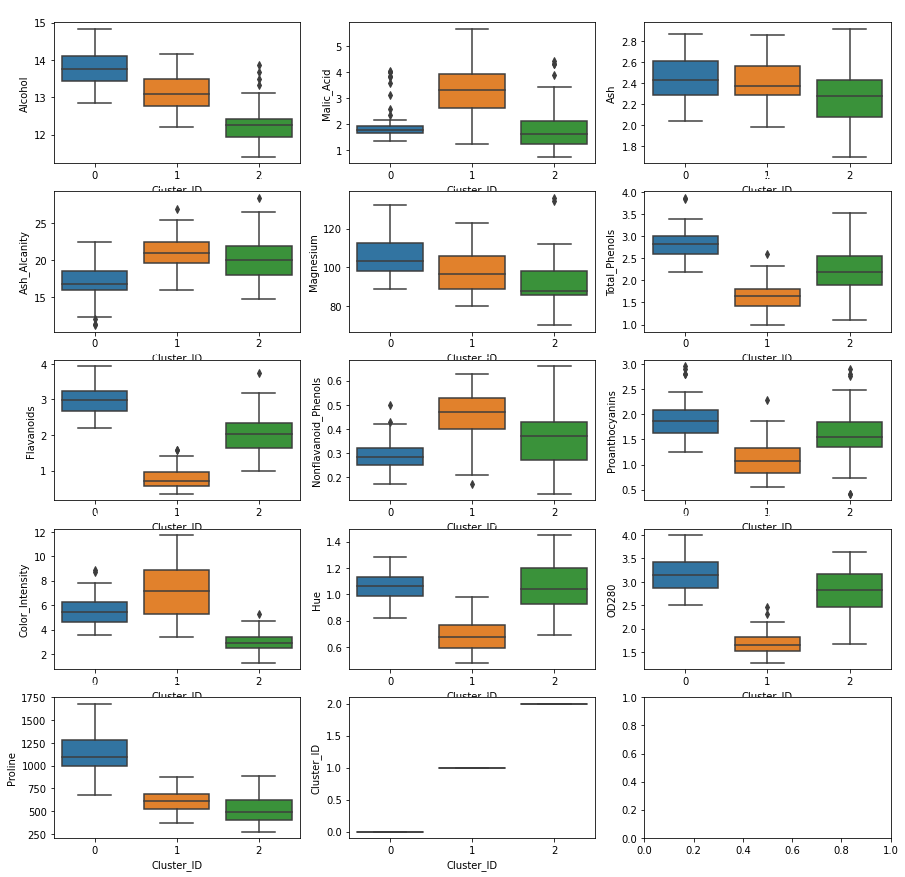

In [22]:
ncols = 15 // 5
nrows = 5

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

for i, column in enumerate(wine_df.columns):
    
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=wine_df, x='Cluster_ID', y=column, ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column} by clusters', color='white')
    
plt.show()

## Hierarchical Clustering

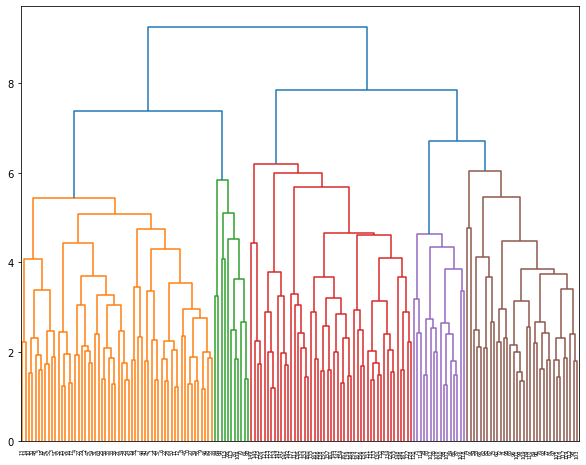

In [23]:
# Complete Linkage

mergings = linkage(wine_sc, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [25]:
# 5 clusters (complete linkage)
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
wine_df['Cluster_Labels'] = cluster_labels
wine_df.head()

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_ID,Cluster_Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0
